<a href="https://colab.research.google.com/github/rzkirahma/analisis_sentimen/blob/main/Review_Aplikasi_Gojek_dengan_Random_Forest_dan_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np

Mengambil 1000 data dari review aplikasi gojek

In [5]:
from google_play_scraper import Sort, reviews
result, continuation_token = reviews(
    'com.gojek.app',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=10000,
    filter_score_with=None
)

In [6]:
print(result[0])

{'reviewId': 'e0d74e62-3890-49fb-83db-73acdb318171', 'userName': 'Ajeng Windy Puspitasari', 'userImage': 'https://play-lh.googleusercontent.com/a-/ACB-R5RajhVP9HFIic6VoVwxVa6y_Vflx8Yvz4F7oXA_NQ', 'content': 'Aplikasi tokai. Makin lama makin menurun performanya. Biaya layanan aja digedein tpi aplikasi makin anjlok. terus biaya layanan buat apa??? Tiba2 ngecancel sendiri pas udah lama nunggu. Dimuat ulang berulang kali juga gak bisa. Smpe restart hp dan coba pesen lagi yaa tetep gak bisaaaa. Terus maunyaa apaaa anjerrr Otw uninstall', 'score': 1, 'thumbsUpCount': 987, 'reviewCreatedVersion': '4.65.2', 'at': datetime.datetime(2023, 4, 12, 6, 38, 46), 'replyContent': "Hai Ajeng, maaf atas kendalanya. Pastikan sinyal internet kamu stabil dan sudah menggunakan aplikasi Gojek versi terbaru. Jika kamu masih berkendala, silakan laporkan melalui menu 'Bantuan' dengan mengetik 'Kendala tampilan dan notifikasi', cantumkan psr-23-103-0454-55695 pada bagian Tell Us More/ Ceritakan lebih lanjut. ^Met

In [7]:
data = pd.DataFrame(np.array(result), columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e0d74e62-3890-49fb-83db-73acdb318171,Ajeng Windy Puspitasari,https://play-lh.googleusercontent.com/a-/ACB-R...,Aplikasi tokai. Makin lama makin menurun perfo...,1,987,4.65.2,2023-04-12 06:38:46,"Hai Ajeng, maaf atas kendalanya. Pastikan siny...",2023-04-13 04:55:12,4.65.2
1,54680767-53d6-4c26-8b68-e051663e8332,Tri Ambar,https://play-lh.googleusercontent.com/a/AGNmyx...,"Ini aplikasi gojek tampilan nya kenapa pula, t...",1,41,4.66.1,2023-05-05 03:22:26,"Hai Tri Ambar, maaf atas kendalanya. Pastikan ...",2023-05-08 03:33:53,4.66.1
2,f0f3cad5-a6a3-4cf2-a138-a7e48b04e305,Bagas Jabbar Isnain,https://play-lh.googleusercontent.com/a-/ACB-R...,Berulang kali walau sudah di update kedua apli...,1,35,4.66.1,2023-04-25 23:00:39,None,NaT,4.66.1
3,47c9c6aa-1d4e-4d60-b522-5b8334c7d1cb,Yek Siang,https://play-lh.googleusercontent.com/a/AGNmyx...,Semua voucher yg ada diskon tidak bisa dipakai...,2,214,4.63.2,2023-04-06 08:52:07,"Hai, mohon maaf atas kendalanya. Terkait lapor...",2023-04-08 05:46:58,4.63.2
4,0fa3ec0b-c3f2-4c6f-88ae-c452f8084f5e,Eka Pramita,https://play-lh.googleusercontent.com/a/AGNmyx...,"Setiap kali bayar pake qris, selalu notifikasi...",2,49,4.66.1,2023-05-02 09:26:26,"Hai Eka, maaf atas kendalanya. Pastikan sinyal...",2023-05-03 08:56:15,4.66.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,692c9a86-83ab-4f3f-b45b-384391be2c9d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus sangat membantu. Tp kmren saya pesen sub...,3,2,3.22.1,2019-02-21 22:19:58,None,NaT,3.22.1
9996,2a2de70d-af5c-477d-ac62-0c20c16481d0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Driver go send membatalkan pesanan sedangkan s...,5,1,3.39.2,2019-11-06 11:25:14,None,NaT,3.39.2
9997,bcc4c4d0-3d05-49d3-bf7c-8188824012d4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sekarang aplikasi gojek sering bgt hrus update...,1,1,3.49.2,2020-03-26 06:38:00,None,NaT,3.49.2
9998,6630a918-5da3-4460-8658-296a06e9ffd9,cacha,https://play-lh.googleusercontent.com/a/AGNmyx...,"tiap buka apps minta di upgrade mulu, pas udh ...",1,0,3.55.2,2020-06-13 12:19:04,None,NaT,3.55.2


In [8]:
scrappeddata1 = data[['content','score','at']]
sorteddata = scrappeddata1.sort_values(by='at', ascending=True)
sorteddata.head()

,content,score,at
8894,Saya kecewa dengan layanan Customer servis goj...,1,2018-09-14 02:52:43
8851,"gimna sih cara menambah bintang,,trus aplikasi...",4,2018-09-14 10:03:43
8882,Tiap saya top up saldo nya ilang mulu.rugii do...,1,2018-09-14 21:11:59
6438,Untuk masalah promo go pay ketentuannya beruba...,1,2018-09-15 07:07:28
5436,"Sekadar memberi saran ya,,tarifnya untuk para ...",5,2018-09-15 16:14:34


In [9]:
sorteddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 8894 to 541
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  10000 non-null  object        
 1   score    10000 non-null  int64         
 2   at       10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 312.5+ KB


In [10]:
sorteddata['Year'] = sorteddata['at'].dt.year
sorteddata['Month'] = sorteddata['at'].dt.month
sorteddata['Day'] = sorteddata['at'].dt.day

In [11]:
sorteddata

,content,score,at,Year,Month,Day
8894,Saya kecewa dengan layanan Customer servis goj...,1,2018-09-14 02:52:43,2018,9,14
8851,"gimna sih cara menambah bintang,,trus aplikasi...",4,2018-09-14 10:03:43,2018,9,14
8882,Tiap saya top up saldo nya ilang mulu.rugii do...,1,2018-09-14 21:11:59,2018,9,14
6438,Untuk masalah promo go pay ketentuannya beruba...,1,2018-09-15 07:07:28,2018,9,15
5436,"Sekadar memberi saran ya,,tarifnya untuk para ...",5,2018-09-15 16:14:34,2018,9,15
...,...,...,...,...,...,...
7898,"Sering double order ni, kasian drivernya",3,2023-05-08 13:13:23,2023,5,8
741,Parah sekarang drivernya ga niat pesen gofood ...,2,2023-05-08 13:23:53,2023,5,8
862,Kenapa akun sy tidak bisa pakai promonya ya..u...,1,2023-05-08 13:29:02,2023,5,8
1219,ok,4,2023-05-09 05:19:11,2023,5,9


In [12]:
df = sorteddata[['content','score','Year','Month','Day']]
df

,content,score,Year,Month,Day
8894,Saya kecewa dengan layanan Customer servis goj...,1,2018,9,14
8851,"gimna sih cara menambah bintang,,trus aplikasi...",4,2018,9,14
8882,Tiap saya top up saldo nya ilang mulu.rugii do...,1,2018,9,14
6438,Untuk masalah promo go pay ketentuannya beruba...,1,2018,9,15
5436,"Sekadar memberi saran ya,,tarifnya untuk para ...",5,2018,9,15
...,...,...,...,...,...
7898,"Sering double order ni, kasian drivernya",3,2023,5,8
741,Parah sekarang drivernya ga niat pesen gofood ...,2,2023,5,8
862,Kenapa akun sy tidak bisa pakai promonya ya..u...,1,2023,5,8
1219,ok,4,2023,5,9


In [13]:
df['score'].value_counts()

1    5041
5    2169
2    1155
3    1000
4     635
Name: score, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 8894 to 541
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  10000 non-null  object
 1   score    10000 non-null  int64 
 2   Year     10000 non-null  int64 
 3   Month    10000 non-null  int64 
 4   Day      10000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 468.8+ KB


Melihat sebaran score

<Axes: xlabel='score'>

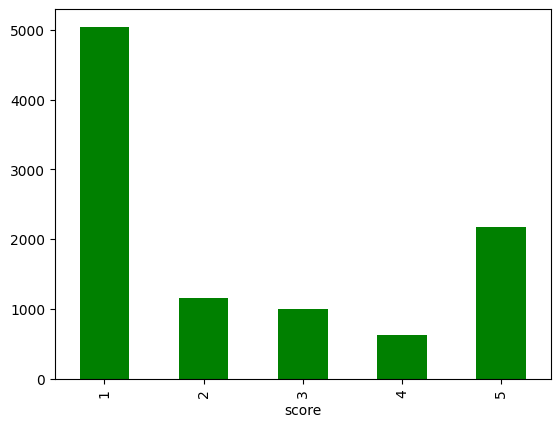

In [15]:
df.groupby(['score']).size().plot(kind = "bar", color = "green")

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Sentimen**
Untuk skor 4-5 dilabeli sentimen positif, ditandai angka 1
skor 3 sentimen netral, ditandai angka 0
skor 1-2 sentimen negatif ditandai angka -1

In [17]:
sentimen = []
for index, row in df.iterrows():
    if row['score'] > 3 :
        sentimen.append(1)
    elif row['score'] == 3:
        sentimen.append(0)
    else:
        sentimen.append(-1)
df['sentiment'] = sentimen
df.head()

,content,score,Year,Month,Day,sentiment
8894,Saya kecewa dengan layanan Customer servis goj...,1,2018,9,14,-1
8851,"gimna sih cara menambah bintang,,trus aplikasi...",4,2018,9,14,1
8882,Tiap saya top up saldo nya ilang mulu.rugii do...,1,2018,9,14,-1
6438,Untuk masalah promo go pay ketentuannya beruba...,1,2018,9,15,-1
5436,"Sekadar memberi saran ya,,tarifnya untuk para ...",5,2018,9,15,1


Sebaran Sentimen

In [18]:
df['sentiment'].value_counts()

-1    6196
 1    2804
 0    1000
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment'>

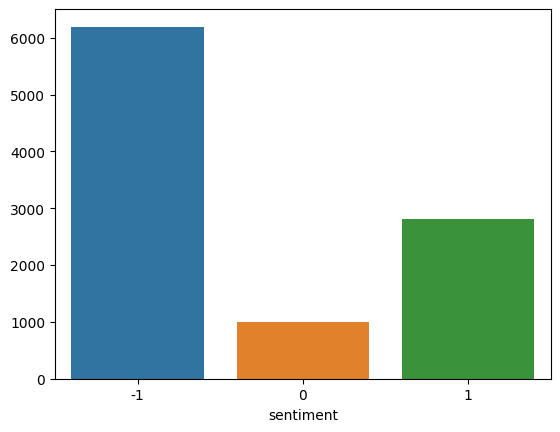

In [19]:
df_new = df[['Year', 'Month', 'sentiment']]
result = df_new.groupby(['sentiment']).size()
 
# plot the result
import seaborn as sns
sns.barplot(x = result.index, y = result.values)

Text(0.5, 1.0, 'Distribution of sentiment')

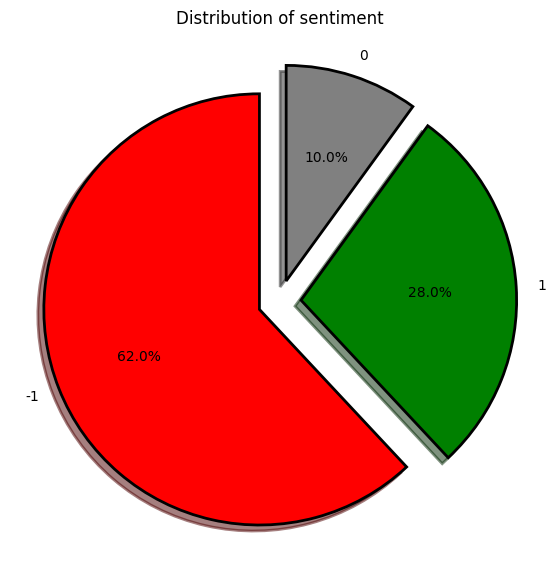

In [20]:
#pie chart untuk menampilkan distribusi sentimen
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'grey')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df_new['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of sentiment')

Distribusi sentimen berdasarkan tahun

<Axes: xlabel='Year', ylabel='count'>

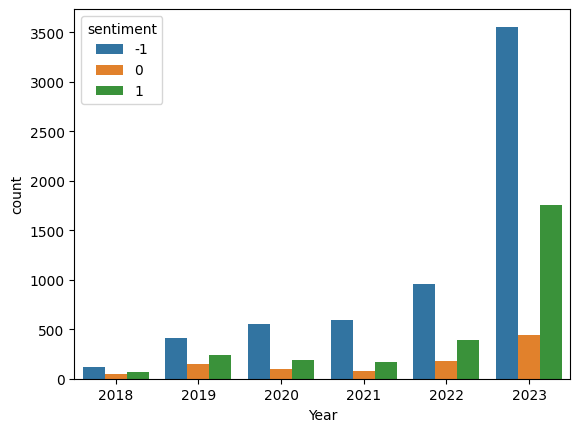

In [21]:
import seaborn as sns
sns.countplot(data=df_new,x='Year',hue='sentiment')

Preprocessing

In [22]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
# menghapus url
df['content'] = df['content'].str.replace('https\S+', ' ', case=False)

In [25]:
# mengubah teks menjadi lowercase (huruf kecil)
df['content'] = df['content'].str.lower()

In [26]:
# menghapus mention
df['content'] = df['content'].str.replace('@\S+', ' ', case=False)

In [27]:
# menghapus hashtag
df['content'] = df['content'].str.replace('#\S+', ' ', case=False)

In [28]:
# menghapus next character
df['content'] = df['content'].str.replace("\'\w+", ' ', case=False)

In [29]:
# menghapus tanda baca
df['content'] = df['content'].str.replace("[^\w\s]", ' ', case=False)

In [30]:
# menghapus ektra whitespace
df['content'] = df['content'].str.replace("\s(2)", ' ', case=False)

In [31]:
# tokenizing
from nltk.tokenize import word_tokenize 

#df['content']=df.apply(lambda row: nltk.word_tokenize(row['content']), axis=1)
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
df['content_token']=df['content'].apply(regexp.tokenize)
df.head(3)


,content,score,Year,Month,Day,sentiment,content_token
8894,saya kecewa dengan layanan customer servis goj...,1,2018,9,14,-1,"[saya, kecewa, dengan, layanan, customer, serv..."
8851,gimna sih cara menambah bintang trus aplikasi...,4,2018,9,14,1,"[gimna, sih, cara, menambah, bintang, trus, ap..."
8882,tiap saya top up saldo nya ilang mulu rugii do...,1,2018,9,14,-1,"[tiap, saya, top, up, saldo, nya, ilang, mulu,..."


Stopword Removal

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words("indonesian")
my_stopwords = ['gojek']
stopwords.extend(my_stopwords)

In [34]:
# menghapus stopwords
df['content_token'] = df['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,content,score,Year,Month,Day,sentiment,content_token
8894,saya kecewa dengan layanan customer servis goj...,1,2018,9,14,-1,"[kecewa, layanan, customer, servis, lambat, me..."
8851,gimna sih cara menambah bintang trus aplikasi...,4,2018,9,14,1,"[gimna, sih, menambah, bintang, trus, aplikasi..."
8882,tiap saya top up saldo nya ilang mulu rugii do...,1,2018,9,14,-1,"[top, up, saldo, nya, ilang, mulu, rugii, klo,..."


Stemming

In [35]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 15.2 MB/s eta 0:00:00


In [36]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [37]:
df['stemmed'] = df['content_token'].apply(lambda x: [stemmer.stem(y) for y in x])

In [38]:
df.head(5)

,content,score,Year,Month,Day,sentiment,content_token,stemmed
8894,saya kecewa dengan layanan customer servis goj...,1,2018,9,14,-1,"[kecewa, layanan, customer, servis, lambat, me...","[kecewa, layan, customer, servis, lambat, mere..."
8851,gimna sih cara menambah bintang trus aplikasi...,4,2018,9,14,1,"[gimna, sih, menambah, bintang, trus, aplikasi...","[gimna, sih, tambah, bintang, trus, aplikasi, ..."
8882,tiap saya top up saldo nya ilang mulu rugii do...,1,2018,9,14,-1,"[top, up, saldo, nya, ilang, mulu, rugii, klo,...","[top, up, saldo, nya, ilang, mulu, rugi, klo, ..."
6438,untuk masalah promo go pay ketentuannya beruba...,1,2018,9,15,-1,"[promo, go, pay, ketentuannya, berubah, ubah, ...","[promo, go, pay, tentu, ubah, ubah, cash, back..."
5436,sekadar memberi saran ya tarifnya untuk para ...,5,2018,9,15,1,"[saran, ya, tarifnya, pengemudi, tolong, diper...","[saran, ya, tarif, kemudi, tolong, perhati, ti..."


In [55]:
df['text_string'] = df['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [56]:
df.head()

,content,score,Year,Month,Day,sentiment,content_token,stemmed,text_string
8894,saya kecewa dengan layanan customer servis goj...,1,2018,9,14,-1,"[kecewa, layanan, customer, servis, lambat, me...","[kecewa, layan, customer, servis, lambat, mere...",kecewa layan customer servis lambat merespon g...
8851,gimna sih cara menambah bintang trus aplikasi...,4,2018,9,14,1,"[gimna, sih, menambah, bintang, trus, aplikasi...","[gimna, sih, tambah, bintang, trus, aplikasi, ...",gimna sih tambah bintang trus aplikasi error l...
8882,tiap saya top up saldo nya ilang mulu rugii do...,1,2018,9,14,-1,"[top, up, saldo, nya, ilang, mulu, rugii, klo,...","[top, up, saldo, nya, ilang, mulu, rugi, klo, ...",top saldo nya ilang mulu rugi klo gin trus tru...
6438,untuk masalah promo go pay ketentuannya beruba...,1,2018,9,15,-1,"[promo, go, pay, ketentuannya, berubah, ubah, ...","[promo, go, pay, tentu, ubah, ubah, cash, back...",promo pay tentu ubah ubah cash back belanja al...
5436,sekadar memberi saran ya tarifnya untuk para ...,5,2018,9,15,1,"[saran, ya, tarifnya, pengemudi, tolong, diper...","[saran, ya, tarif, kemudi, tolong, perhati, ti...",saran tarif kemudi tolong perhati timbang kasi...


**Wordcloud**
Visualisasi yang menggambarkan daftar kata-kata yang digunakan dalam teks. Semakin banyak kata, maka semakin besar ukuran kata tersebut dalam gambar

In [57]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
# sentimen positif
df_p=df[df['sentiment']==1]

In [60]:
all_words_lem = ' '.join([word for word in df_p['text_string']])

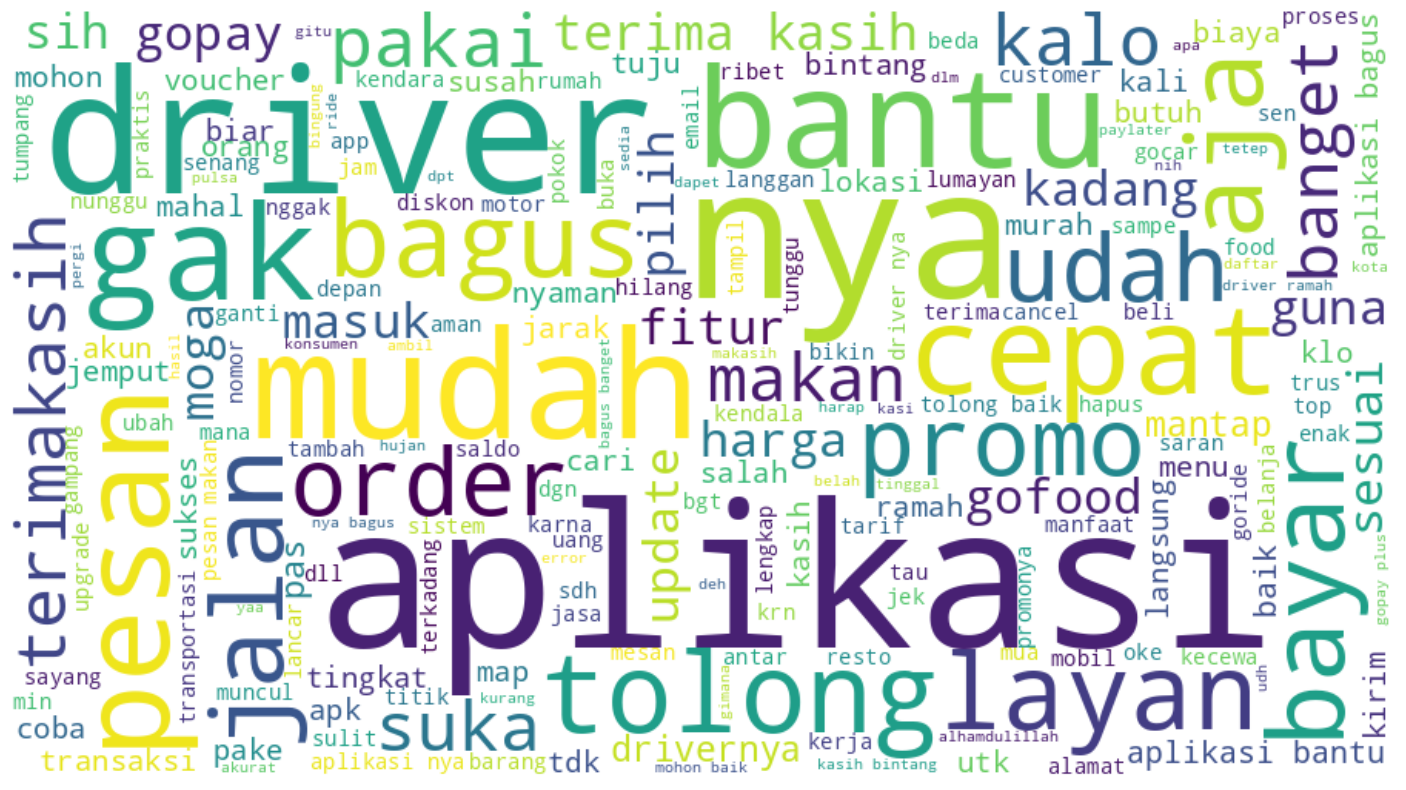

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=900, height=500, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [62]:
# sentimen negatif
df_neg=df[df['sentiment']==-1]
all_words_lemneg = ' '.join([word for word in df_neg['text_string']])

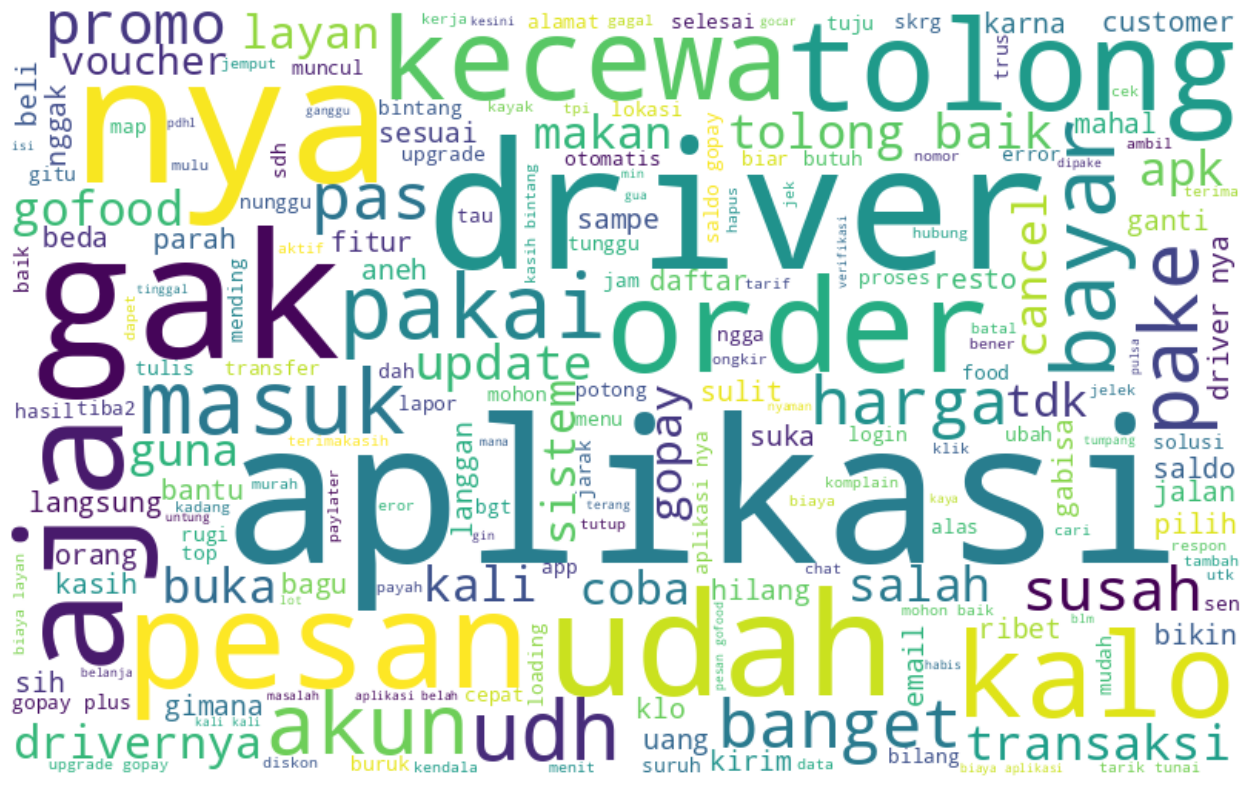

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemneg)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [64]:
# Sentimen netral
df_net=df[df['sentiment']==0]
all_words_lemnet = ' '.join([word for word in df_net['text_string']])

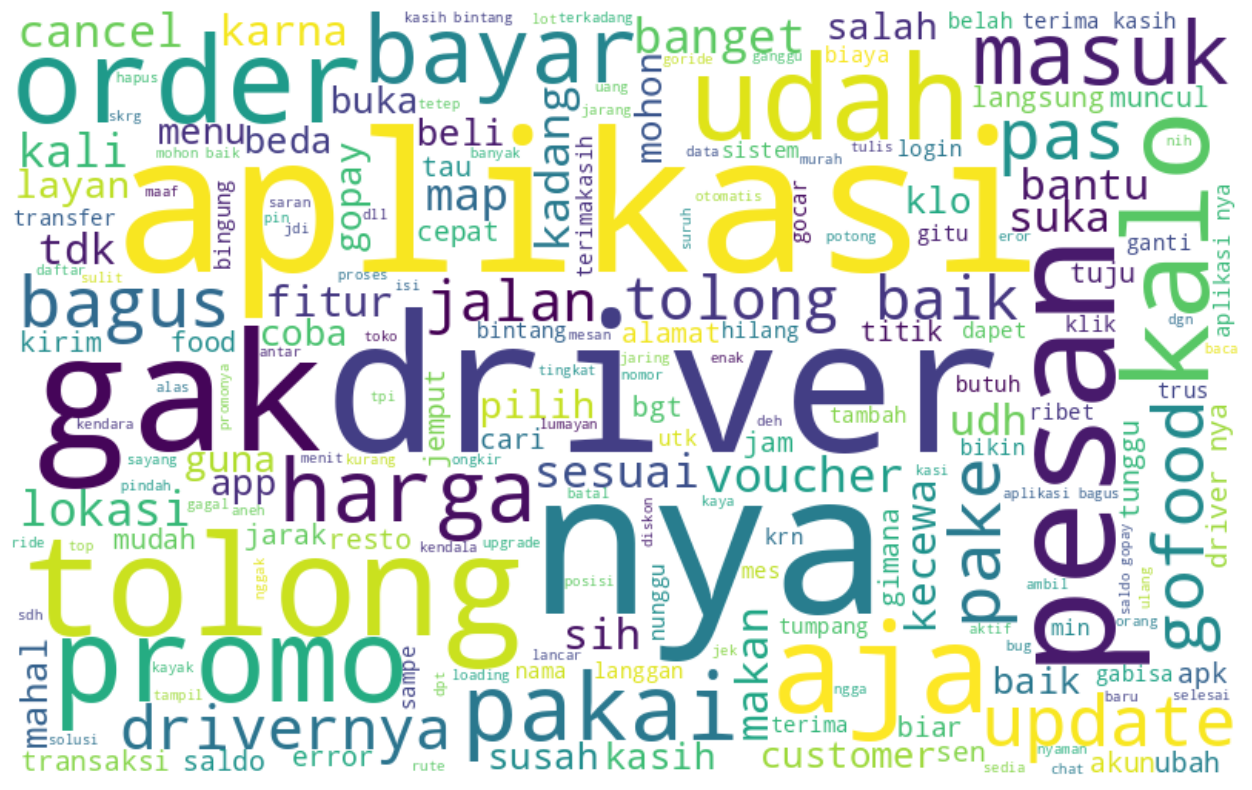

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemnet)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [66]:
df['text_string']

8894    kecewa layan customer servis lambat merespon g...
8851    gimna sih tambah bintang trus aplikasi error l...
8882    top saldo nya ilang mulu rugi klo gin trus tru...
6438    promo pay tentu ubah ubah cash back belanja al...
5436    saran tarif kemudi tolong perhati timbang kasi...
                              ...                        
7898                          double order kasi drivernya
741     parah drivernya niat sen gofood karna ongkos n...
862     akun pakai promonya update udah uninstal trus ...
1219                                                     
541     club jamin prioritas pesan layan aplikasi jala...
Name: text_string, Length: 10000, dtype: object

In [67]:
X = df['text_string']
y = df['sentiment']

In [69]:
# TF IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [71]:
# Handling imbalanced using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

Split Data

In [74]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2,random_state=3)

Modelling

In [76]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier 
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
RandomForestClassifier()

RandomForestClassifier()

In [78]:
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(random_forest_classifier_prediction,y_test)

0.9112426035502958

In [82]:
# Support Vectore Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [83]:
svm_prediction =  svm.predict(X_test)

In [84]:
accuracy_score(svm_prediction,y_test)

0.8980634749865519

Distribusi Frekuensi

In [85]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [86]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

Kata paling banyak digunakan

In [87]:
fd.most_common(3)

[('aplikasi', 1051), ('nya', 838), ('driver', 641)]

In [88]:
fd.tabulate(3)

aplikasi      nya   driver 
    1051      838      641 


In [89]:
# Obtain top 10 words
top_10 = fd.most_common(10)
fdist = pd.Series(dict(top_10))

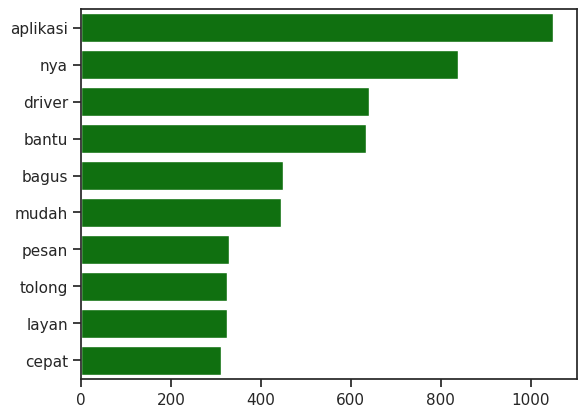

In [90]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.barplot(y=fdist.index, x=fdist.values, color='green');